In [1]:
# add parent dir to sys.path so we can import from repo base
import os; import sys; sys.path.append(os.path.dirname(os.path.realpath(os.getcwd())))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

from tsfresh.transformers import RelevantFeatureAugmenter

from script.dataset import get_data
from script.visualization import report_cm

In [3]:
# Parameters
leave_out = 'p1'
k_folds = 5
random_state = 42

In [4]:
# Load data
ts, y = get_data()

# Prepare the DataFrame
X = pd.DataFrame(index=y.index)
split = y.index.str.contains(leave_out)
X_train_full, X_test, y_train_full, y_test = (X[~split], X[split], y[~split], y[split])

In [5]:
# Initialize KFold
kf = KFold(n_splits=k_folds, shuffle=True, random_state=random_state)
best_model = None
best_score = 0

In [6]:
# Perform k-fold cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X_train_full)):
    print(f'Fold {fold + 1}/{k_folds}')
    
    # Split the data
    X_train, X_val = X_train_full.iloc[train_index], X_train_full.iloc[val_index]
    y_train, y_val = y_train_full.iloc[train_index], y_train_full.iloc[val_index]
    
    # Define pipeline
    ppl = Pipeline([
        ('augmenter', RelevantFeatureAugmenter(column_id='id', column_sort='time')),
        ('classifier', RandomForestClassifier(random_state=random_state))
    ])
    ppl.set_params(augmenter__timeseries_container=ts)

    # Train model
    ppl.fit(X_train, y_train)
    
    # Validate model
    y_val_pred = ppl.predict(X_val)
    val_score = accuracy_score(y_val, y_val_pred)
    print(f'Validation Accuracy: {val_score:.4f}')
    
    # Save the best model
    if val_score > best_score:
        best_score = val_score
        best_model = ppl


Fold 1/5


Feature Extraction: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:32<00:00,  1.30s/it]
/Users/jannisbaum/_/hpi/terms/msc-2/ds4w/.pyv/lib/python3.12/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['EMG_4_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_5_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_6_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_7_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_0__query_similarity_count__query_None__threshold_0.0'
 'EMG_1__query_similarity_count__query_None__threshold_0.0'
 'EMG_2__query_similarity_count__query_None__threshold_0.0'
 'EMG_3__query_similarity_count__query_None__threshold_0.0'
 'EMG_4__query_similarity_count__query_None__threshold_0.0'
 'EMG_5__query_similarity_count__query_None__threshold_0.0'
 'EMG_6__query_similarity_count__query_None__threshold_0.0'
 'EMG_7__query_

Validation Accuracy: 0.8298
Fold 2/5


Feature Extraction: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:32<00:00,  1.31s/it]
/Users/jannisbaum/_/hpi/terms/msc-2/ds4w/.pyv/lib/python3.12/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['EMG_4_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_5_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_6_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_7_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_0__query_similarity_count__query_None__threshold_0.0'
 'EMG_1__query_similarity_count__query_None__threshold_0.0'
 'EMG_2__query_similarity_count__query_None__threshold_0.0'
 'EMG_3__query_similarity_count__query_None__threshold_0.0'
 'EMG_4__query_similarity_count__query_None__threshold_0.0'
 'EMG_5__query_similarity_count__query_None__threshold_0.0'
 'EMG_6__query_similarity_count__query_None__threshold_0.0'
 'EMG_7__query_

Validation Accuracy: 0.8511
Fold 3/5


Feature Extraction: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:33<00:00,  1.32s/it]
/Users/jannisbaum/_/hpi/terms/msc-2/ds4w/.pyv/lib/python3.12/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['EMG_0__query_similarity_count__query_None__threshold_0.0'
 'EMG_1__query_similarity_count__query_None__threshold_0.0'
 'EMG_2__query_similarity_count__query_None__threshold_0.0'
 'EMG_3__query_similarity_count__query_None__threshold_0.0'
 'EMG_4__query_similarity_count__query_None__threshold_0.0'
 'EMG_5__query_similarity_count__query_None__threshold_0.0'
 'EMG_6__query_similarity_count__query_None__threshold_0.0'
 'EMG_7__query_similarity_count__query_None__threshold_0.0'
 'EMG_0_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_1_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_2_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_3_cal__query_

Validation Accuracy: 0.8261
Fold 4/5


Feature Extraction: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:30<00:00,  1.23s/it]
/Users/jannisbaum/_/hpi/terms/msc-2/ds4w/.pyv/lib/python3.12/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['EMG_0__query_similarity_count__query_None__threshold_0.0'
 'EMG_1__query_similarity_count__query_None__threshold_0.0'
 'EMG_2__query_similarity_count__query_None__threshold_0.0'
 'EMG_3__query_similarity_count__query_None__threshold_0.0'
 'EMG_4__query_similarity_count__query_None__threshold_0.0'
 'EMG_5__query_similarity_count__query_None__threshold_0.0'
 'EMG_6__query_similarity_count__query_None__threshold_0.0'
 'EMG_7__query_similarity_count__query_None__threshold_0.0'
 'EMG_0_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_1_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_2_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_3_cal__query_

Validation Accuracy: 0.9783
Fold 5/5


Feature Extraction: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:32<00:00,  1.32s/it]
/Users/jannisbaum/_/hpi/terms/msc-2/ds4w/.pyv/lib/python3.12/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['EMG_0__query_similarity_count__query_None__threshold_0.0'
 'EMG_1__query_similarity_count__query_None__threshold_0.0'
 'EMG_2__query_similarity_count__query_None__threshold_0.0'
 'EMG_3__query_similarity_count__query_None__threshold_0.0'
 'EMG_4__query_similarity_count__query_None__threshold_0.0'
 'EMG_5__query_similarity_count__query_None__threshold_0.0'
 'EMG_6__query_similarity_count__query_None__threshold_0.0'
 'EMG_7__query_similarity_count__query_None__threshold_0.0'
 'EMG_0_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_1_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_2_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_3_cal__query_

Validation Accuracy: 0.9130


Best Validation Accuracy: 0.9783


Feature Extraction: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:04<00:00,  5.34it/s]


# Results: p1

accuracy: 0.9625


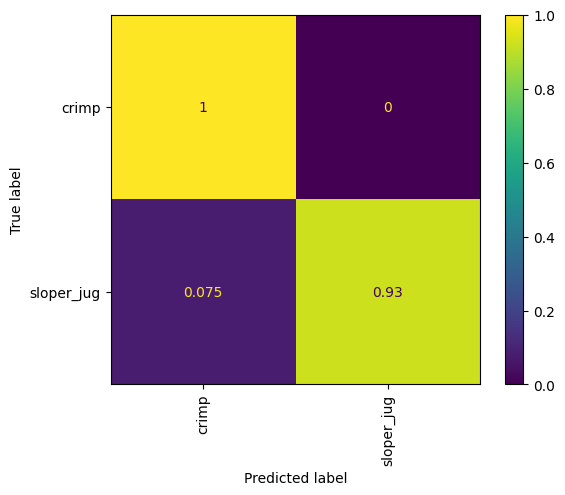

              precision    recall  f1-score   support

       crimp       0.93      1.00      0.96        40
  sloper_jug       1.00      0.93      0.96        40

    accuracy                           0.96        80
   macro avg       0.97      0.96      0.96        80
weighted avg       0.97      0.96      0.96        80



In [7]:
# Final evaluation on the test set
print(f'Best Validation Accuracy: {best_score:.4f}')
y_test_pred = best_model.predict(X_test)
report_cm(f'Results: {leave_out}', y_test, y_test_pred, best_model.named_steps['classifier'].classes_)
print(classification_report(y_test, y_test_pred))